In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [ ]:
noisy_curvefit_data = pd.read_csv("../course_assignments/homework9/noisy_curvefit_data.csv")

noisy_curvefit_data

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113


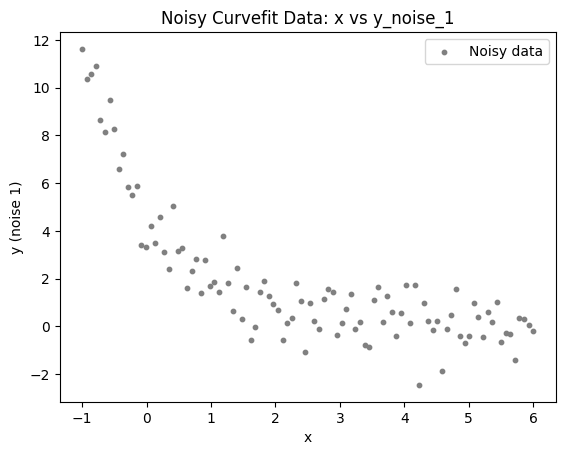

In [8]:
plt.scatter(noisy_curvefit_data["x"], noisy_curvefit_data["y_noise_1"], s=10, color="gray", label="Noisy data")

# Labels and title
plt.xlabel("x")
plt.ylabel("y (noise 1)")
plt.title("Noisy Curvefit Data: x vs y_noise_1")

# Legend
plt.legend()

plt.show()

In [9]:
def model(x, A, k):
    return A * np.exp(-k * x)

In [12]:
p0 = [1,1]
x = noisy_curvefit_data["x"]
y_noise_1 = noisy_curvefit_data["y_noise_1"]
popt, pcov = curve_fit(model, x, y_noise_1, p0=p0)

In [13]:
A_fit, k_fit = popt

In [14]:
f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)"

'Fit: y = 4.71 * e^(-0.92 * x)'

In [15]:
residuals = y_noise_1 - model(x, A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(x) - len(popt)
chi2_reduced = chi2 / dof

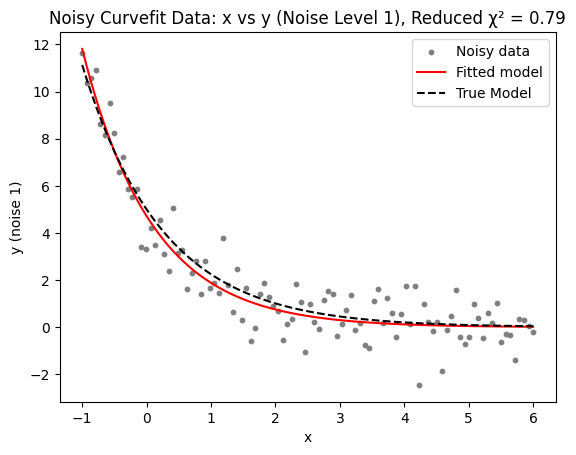

In [ ]:
plt.scatter(noisy_curvefit_data["x"], noisy_curvefit_data["y_noise_1"], s=10, color="gray", label="Noisy data")
plt.plot(x, model(x, A_fit, k_fit), color="red", label="Fitted model")
plt.plot(x, model(x, 5, 0.8), color="black", linestyle="--",label="True Model")

# Labels and title
plt.xlabel("x")
plt.ylabel("y (noise 1)")
plt.title(f"Noisy Curvefit Data: x vs y (Noise Level 1), Reduced χ² = {chi2_reduced:.2f}")


# Legend
plt.legend()

plt.show(

In [19]:
def fit_model(x, y):
    # --- Fit ---   
    p0 = [1,1]
    popt, pcov = curve_fit(model, x, y, p0=p0)
    A_fit, k_fit = popt

    # --- Compute chi-squared ---
    y_fit = model(x, A_fit, k_fit)
    residuals = y - y_fit

    chi2 = np.sum(residuals**2)

    dof = len(x) - len(popt)
    chi2_red = chi2 / dof

    return popt, chi2_red

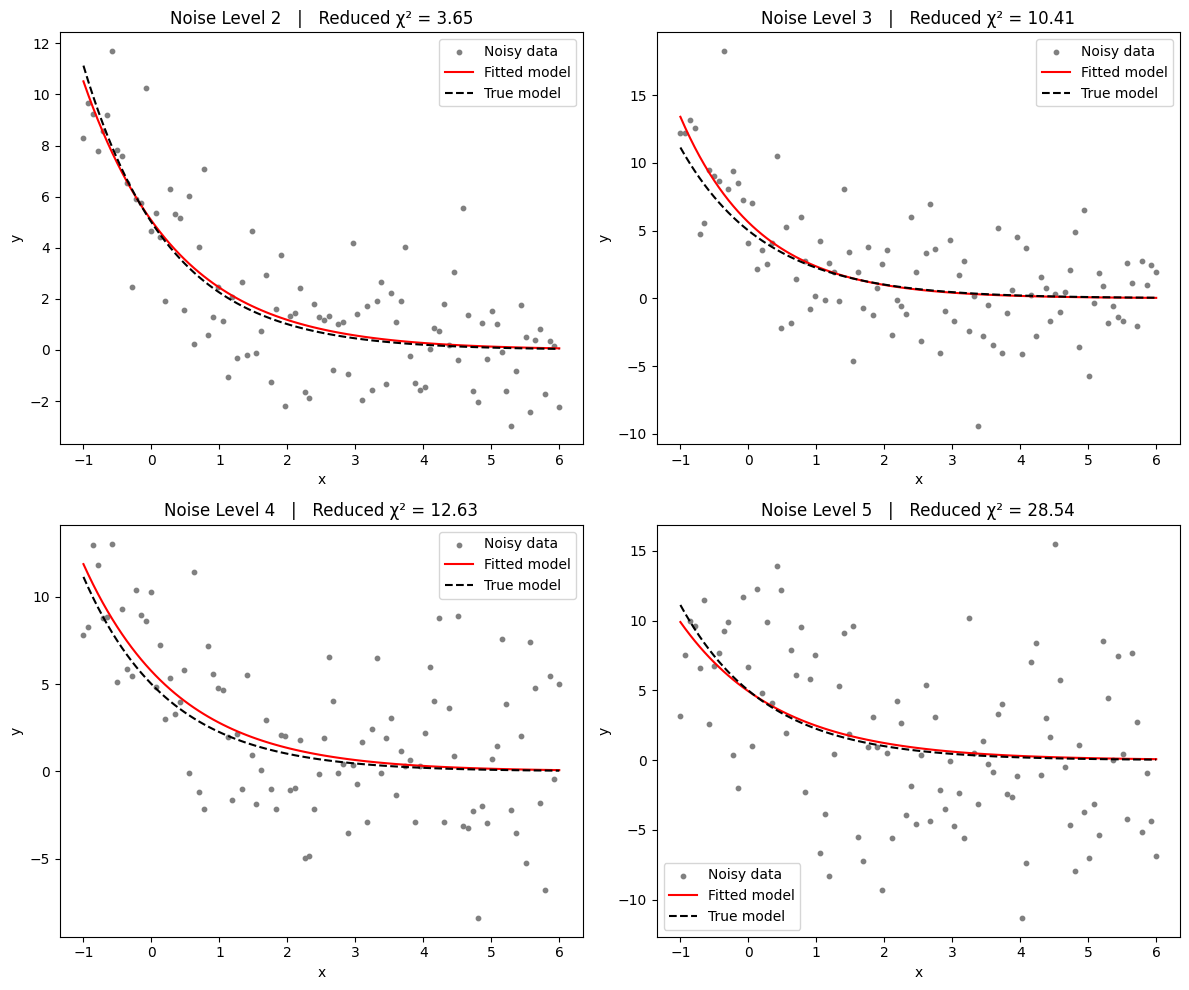

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()   # flatten to 1D list for easy looping

x = noisy_curvefit_data["x"]
noise_levels = ["y_noise_2","y_noise_3","y_noise_4","y_noise_5"]
for i, col in enumerate(noise_levels):
       
    y = noisy_curvefit_data[col].values
    noise_level = i+2

    # --- Fit the model ---
    popt, chi2_red = fit_model(x, y)
    a_fit, b_fit = popt

    # --- Evaluate fitted and true models ---
    y_fit = model(x, a_fit, b_fit)
    y_true = model(x, 5, 0.8)

    ax = axes[i]

    # --- Scatter noisy data ---
    ax.scatter(x, y, s=10, color="gray", label="Noisy data")

    # --- Fitted model ---
    ax.plot(x, y_fit, color="red", label="Fitted model")

    # --- True model ---
    ax.plot(x, y_true, color="black", linestyle="--", label="True model")

    # --- Labels & title ---
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Noise Level {noise_level}   |   Reduced χ² = {chi2_red:.2f}")

    ax.legend()

plt.tight_layout()
plt.show()

In [28]:
noise_cols = [
    "y_noise_1",
    "y_noise_2",
    "y_noise_3",
    "y_noise_4",
    "y_noise_5"
]

rows = []

for col in noise_cols:
    y = noisy_curvefit_data[col].to_numpy()

    noise_level = int(col.split("_")[-1])

    # Fit
    popt, chi2_red = fit_model(x, y)
    a_fit, k_fit = popt

    rows.append([noise_level, a_fit, k_fit, chi2_red])

df_params = pd.DataFrame(
    rows,
    columns=["Noise level", "a fit", "k fit", "Reduced chi-squared"]
)

df_params.to_csv("noisy_parameters.csv", index=False)